In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv("../data/cleaned_metu_ring.csv")

In [3]:
df.head()

,Gender,Residence,Study_Level,Faculty,Grad_School,Visiting_Faculty_GradSchool,Affiliation_Program,Freq_Taxi,Freq_Ring,Freq_Walking,...,Problem_NotClean,Problem_DriverBehavior,Understanding_Routes,Avg_Wait_Time,UseMore_IfFrequent,App_Helping_Ring,MostValuable_Improvement,Overall_Satisfaction,Open_Comments,Department
0,Male,"East Dorms (1st Dorm, 2nd Dorm, 16th Guesthous...",Undergraduate (Bachelor’s),Faculty of Engineering,NaN,NaN,NaN,Rarely,Sometimes,Always,...,Often,Always,1.0,11–15 minutes,Yes,5.0,Better route coverage,2.0,The buses should have a much better indication...,Electrical and Electronics Engineering
1,Female,"West Dorms (Isa Demiray Student Dormitory, 19t...",Undergraduate (Bachelor’s),Faculty of Arts and Sciences,NaN,NaN,NaN,Rarely,Often,Sometimes,...,Sometimes,Never,3.0,11–15 minutes,Yes,5.0,More frequent buses,4.0,NaN,Psychology
2,Female,"West Dorms (Isa Demiray Student Dormitory, 19t...",Undergraduate (Bachelor’s),Faculty of Engineering,NaN,NaN,NaN,Rarely,Always,Always,...,Often,Never,5.0,11–15 minutes,Yes,5.0,Better route coverage,3.0,NaN,Computer Engineering
3,Male,"West Dorms (Isa Demiray Student Dormitory, 19t...",Undergraduate (Bachelor’s),Faculty of Engineering,NaN,NaN,NaN,Rarely,Always,Always,...,Never,Never,5.0,5–10 minutes,Yes,2.0,Better route coverage,3.0,The weekday evening busses’ route is overlappi...,Civil Engineering
4,Male,Off-campus (within walking distance),Undergraduate (Bachelor’s),Faculty of Economic and Administrative Sciences,NaN,NaN,NaN,Often,Sometimes,Often,...,Never,Never,2.0,11–15 minutes,Yes,4.0,Better real-time tracking,4.0,NaN,International Relations


In [6]:
df.columns[list(map(lambda x: "UseMore_IfFrequent" in x.lower(), df.columns))]

Index([], dtype='object')

In [8]:
df.columns

Index(['Gender', 'Residence', 'Study_Level', 'Faculty', 'Grad_School',
       'Visiting_Faculty_GradSchool', 'Affiliation_Program', 'Freq_Taxi',
       'Freq_Ring', 'Freq_Walking', 'Freq_Hitchhiking', 'Freq_PersonalVehicle',
       'Weekday_Ring_Frequency', 'Weekday_Ring_TimeSlots',
       'Weekday_Schedule_Satisfaction', 'Weekend_Ring_Frequency',
       'Weekend_Ring_TimeSlots', 'Weekend_Schedule_Satisfaction',
       'Route_Used_Most', 'Ring_Purposes', 'Ring_Reasons', 'Problem_LateBus',
       'Problem_TooCrowded', 'Problem_LongWait', 'Problem_NotMyRoute',
       'Problem_RouteConfusing', 'Problem_HoursMismatch', 'Problem_NotClean',
       'Problem_DriverBehavior', 'Understanding_Routes', 'Avg_Wait_Time',
       'UseMore_IfFrequent', 'App_Helping_Ring', 'MostValuable_Improvement',
       'Overall_Satisfaction', 'Open_Comments', 'Department'],
      dtype='object')

In [10]:
df["UseMore_IfFrequent"].value_counts()

UseMore_IfFrequent
Yes         292
Not sure     22
No           11
Name: count, dtype: int64

In [14]:
df["MostValuable_Improvement"].value_counts()

MostValuable_Improvement
More frequent buses          164
Better route coverage         66
Extended service hours        51
Better real-time tracking     33
Improved punctuality           8
More comfortable buses         3
Name: count, dtype: int64

In [19]:
df['Residence'] = df['Residence'].replace('Postgraduate Guesthouse', 'West Dorms (Isa Demiray Student Dormitory, 19th Dorm, etc.)')

In [12]:
freq_table = df['UseMore_IfFrequent'].value_counts()
freq_pct = df['UseMore_IfFrequent'].value_counts(normalize=True) * 100

In [15]:
overall_table = pd.DataFrame({
    'Count': freq_table,
    'Percentage': freq_pct.round(2)
})

In [16]:
overall_table

,Count,Percentage
UseMore_IfFrequent,,
Yes,292,89.85
Not sure,22,6.77
No,11,3.38


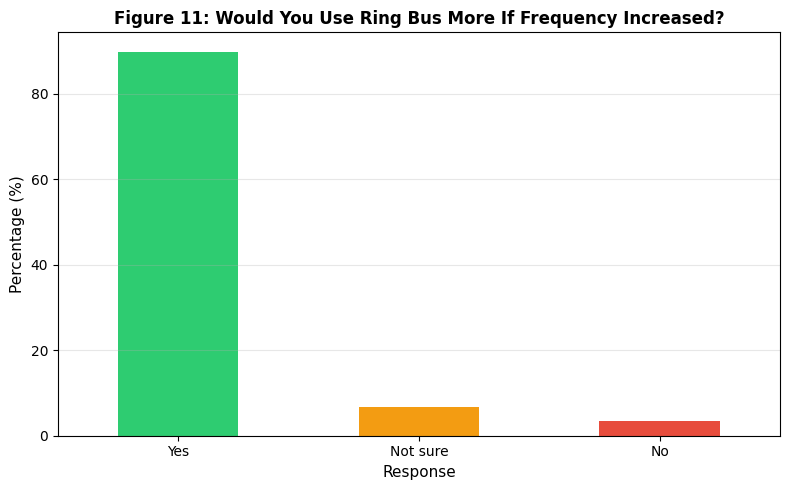

In [17]:
fig, ax = plt.subplots(figsize=(8, 5))
freq_pct.plot(kind='bar', ax=ax, color=['#2ecc71', '#f39c12', '#e74c3c'])
ax.set_xlabel('Response', fontsize=11)
ax.set_ylabel('Percentage (%)', fontsize=11)
ax.set_title('Figure 11: Would You Use Ring Bus More If Frequency Increased?', 
              fontsize=12, fontweight='bold')
ax.set_xticklabels(freq_pct.index, rotation=0)
ax.grid(axis='y', alpha=0.3)
plt.tight_layout()
plt.show()

In [21]:
residence_crosstab = pd.crosstab(df['Residence'], df['UseMore_IfFrequent'], normalize='index') * 100
residence_crosstab

UseMore_IfFrequent,No,Not sure,Yes
Residence,,,
"East Dorms (1st Dorm, 2nd Dorm, 16th Guesthouse, etc.)",5.072464,7.246377,87.681159
Off-campus (far from campus),7.142857,7.142857,85.714286
Off-campus (within walking distance),0.000000,7.142857,92.857143
"West Dorms (Isa Demiray Student Dormitory, 19th Dorm, etc.)",0.000000,5.982906,94.017094


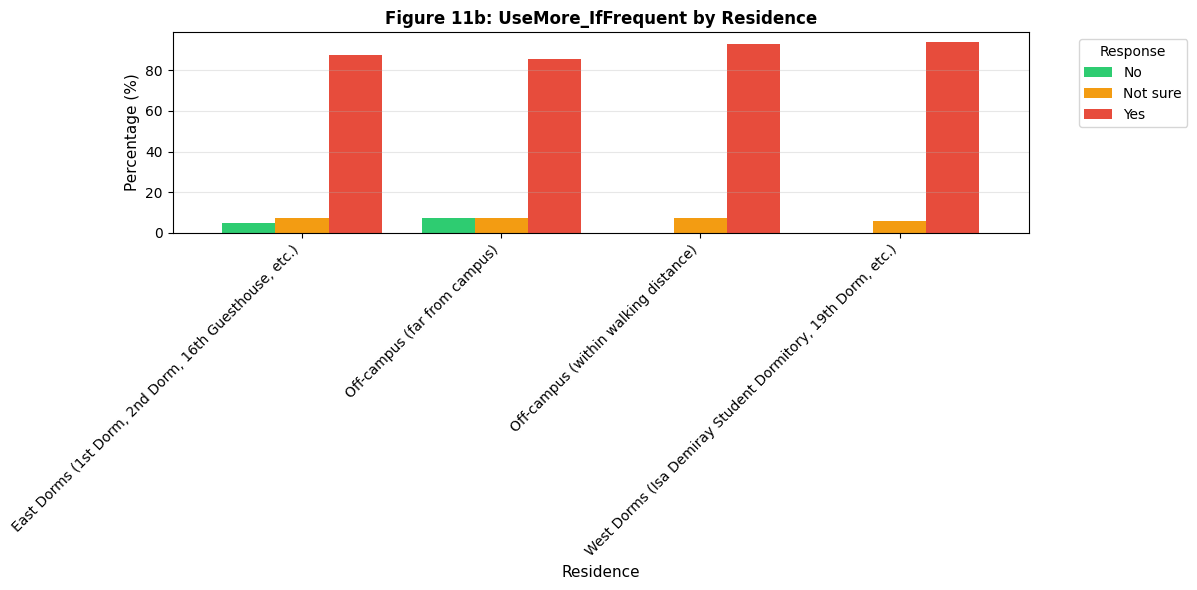

In [22]:
fig, ax = plt.subplots(figsize=(12, 6))
residence_crosstab.plot(kind='bar', ax=ax, 
                        color=['#2ecc71', '#f39c12', '#e74c3c'],
                        width=0.8)
ax.set_xlabel('Residence', fontsize=11)
ax.set_ylabel('Percentage (%)', fontsize=11)
ax.set_title('Figure 11b: UseMore_IfFrequent by Residence', 
              fontsize=12, fontweight='bold')
ax.legend(title='Response', bbox_to_anchor=(1.05, 1), loc='upper left')
ax.set_xticklabels(residence_crosstab.index, rotation=45, ha='right')
ax.grid(axis='y', alpha=0.3)
plt.tight_layout()
plt.show()

In [23]:
residence_crosstab['Yes'].sort_values(ascending=False)

Residence
West Dorms (Isa Demiray Student Dormitory, 19th Dorm, etc.)    94.017094
Off-campus (within walking distance)                           92.857143
East Dorms (1st Dorm, 2nd Dorm, 16th Guesthouse, etc.)         87.681159
Off-campus (far from campus)                                   85.714286
Name: Yes, dtype: float64

In [24]:
usage_map = {
    'Never': 'Low',
    'Rarely': 'Low',
    'Sometimes': 'Medium',
    'Often': 'High',
    'Always': 'High'
}

In [ ]:
df['Usage_Intensity'] = df['Freq_Ring'].map(usage_map)

In [26]:
usage_crosstab = pd.crosstab(df['Usage_Intensity'], df['UseMore_IfFrequent'], 
                              normalize='index') * 100

In [27]:
usage_crosstab

UseMore_IfFrequent,No,Not sure,Yes
Usage_Intensity,,,
High,1.687764,5.485232,92.827004
Low,20.000000,5.000000,75.000000
Medium,4.411765,11.764706,83.823529


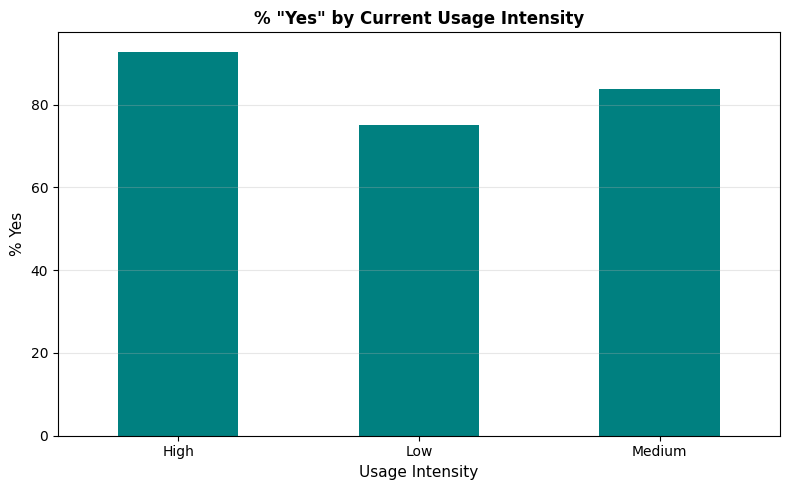

In [28]:
fig, ax = plt.subplots(figsize=(8, 5))
yes_by_usage = usage_crosstab['Yes']
yes_by_usage.plot(kind='bar', ax=ax, color='teal')
ax.set_xlabel('Usage Intensity', fontsize=11)
ax.set_ylabel('% Yes', fontsize=11)
ax.set_title('% "Yes" by Current Usage Intensity', fontsize=12, fontweight='bold')
ax.set_xticklabels(yes_by_usage.index, rotation=0)
ax.grid(axis='y', alpha=0.3)
plt.tight_layout()
plt.show()

In [29]:
df['Problem_TooCrowded_Binary'] = df['Problem_TooCrowded'].isin(['Often', 'Always'])
df['Problem_LongWait_Binary'] = df['Problem_LongWait'].isin(['Often', 'Always'])


In [30]:
crowding_crosstab = pd.crosstab(df['Problem_TooCrowded_Binary'], 
                                df['UseMore_IfFrequent'], 
                                normalize='index') * 100


In [31]:
crowding_crosstab

UseMore_IfFrequent,No,Not sure,Yes
Problem_TooCrowded_Binary,,,
False,8.450704,8.450704,83.098592
True,1.968504,6.299213,91.732283


In [32]:
wait_crosstab = pd.crosstab(df['Problem_LongWait_Binary'], 
                            df['UseMore_IfFrequent'], 
                            normalize='index') * 100

In [33]:
wait_crosstab

UseMore_IfFrequent,No,Not sure,Yes
Problem_LongWait_Binary,,,
False,6.666667,12.500000,80.833333
True,1.463415,3.414634,95.121951


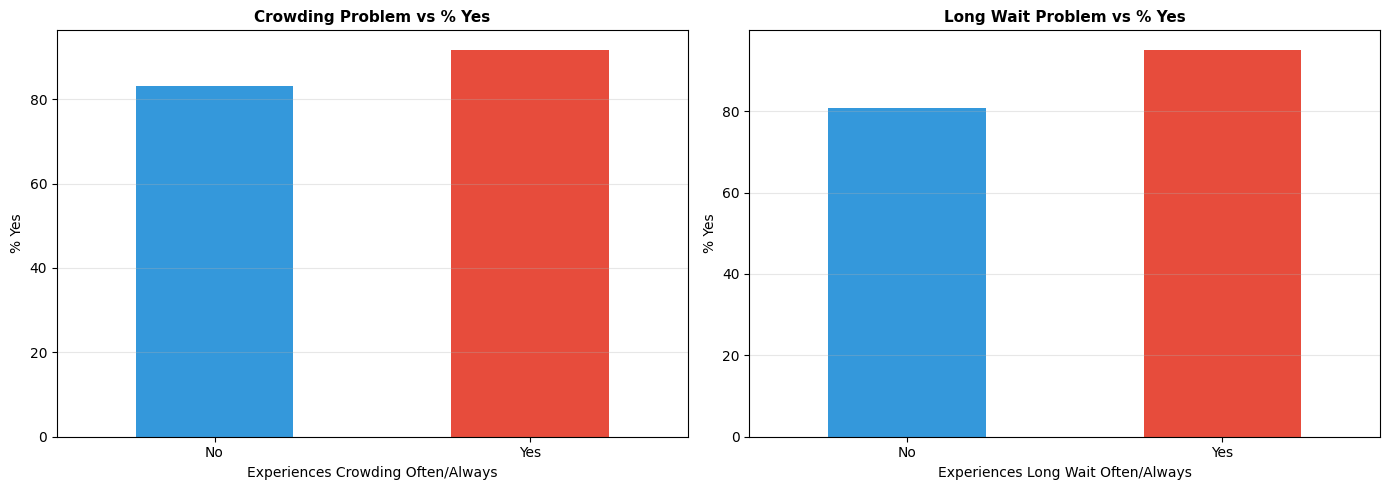

In [34]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(14, 5))

# Crowding
crowding_yes = crowding_crosstab['Yes']
crowding_yes.plot(kind='bar', ax=ax1, color=['#3498db', '#e74c3c'])
ax1.set_xlabel('Experiences Crowding Often/Always', fontsize=10)
ax1.set_ylabel('% Yes', fontsize=10)
ax1.set_title('Crowding Problem vs % Yes', fontsize=11, fontweight='bold')
ax1.set_xticklabels(['No', 'Yes'], rotation=0)
ax1.grid(axis='y', alpha=0.3)

# Long Wait
wait_yes = wait_crosstab['Yes']
wait_yes.plot(kind='bar', ax=ax2, color=['#3498db', '#e74c3c'])
ax2.set_xlabel('Experiences Long Wait Often/Always', fontsize=10)
ax2.set_ylabel('% Yes', fontsize=10)
ax2.set_title('Long Wait Problem vs % Yes', fontsize=11, fontweight='bold')
ax2.set_xticklabels(['No', 'Yes'], rotation=0)
ax2.grid(axis='y', alpha=0.3)

plt.tight_layout()
plt.show()

In [35]:
overall_yes_pct = (df['UseMore_IfFrequent'] == 'Yes').sum() / len(df) * 100


In [36]:
overall_yes_pct

np.float64(89.84615384615384)

In [37]:
(df['UseMore_IfFrequent'] == 'Not sure').sum() / len(df) * 100

np.float64(6.769230769230769)

In [38]:
f"Overall % No: {(df['UseMore_IfFrequent'] == 'No').sum() / len(df) * 100:.1f}%"

'Overall % No: 3.4%'

In [39]:
usage_crosstab

UseMore_IfFrequent,No,Not sure,Yes
Usage_Intensity,,,
High,1.687764,5.485232,92.827004
Low,20.000000,5.000000,75.000000
Medium,4.411765,11.764706,83.823529


In [40]:
improvement_counts = df['MostValuable_Improvement'].value_counts()
improvement_pct = df['MostValuable_Improvement'].value_counts(normalize=True) * 100

improvement_table = pd.DataFrame({
    'Count': improvement_counts,
    'Percentage': improvement_pct.round(2)
})
improvement_table = improvement_table.sort_values('Percentage', ascending=False)

print("\nRanked Improvement Priorities:")
print(improvement_table)



Ranked Improvement Priorities:
                           Count  Percentage
MostValuable_Improvement                    
More frequent buses          164       50.46
Better route coverage         66       20.31
Extended service hours        51       15.69
Better real-time tracking     33       10.15
Improved punctuality           8        2.46
More comfortable buses         3        0.92


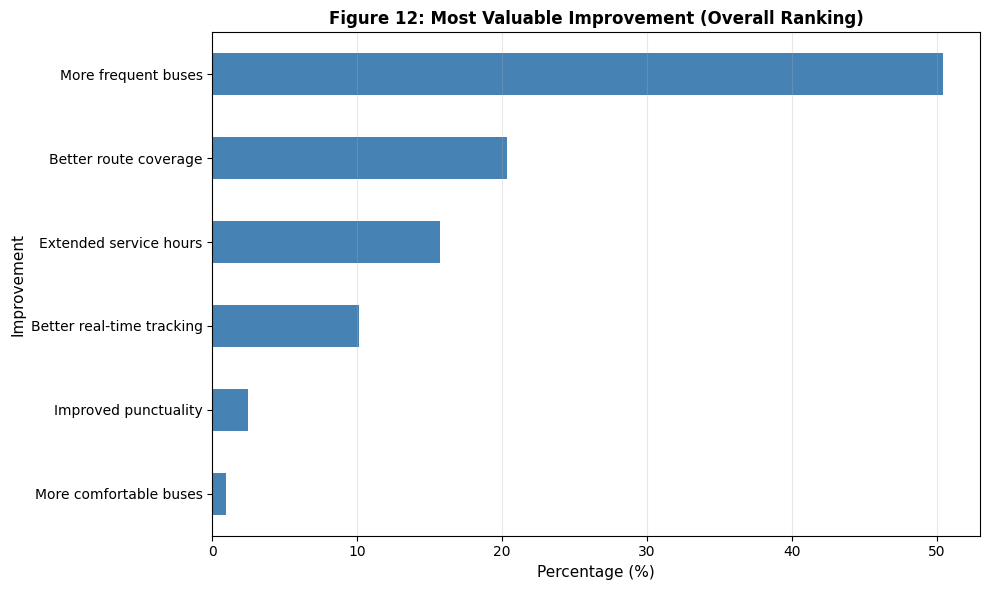

In [41]:
fig, ax = plt.subplots(figsize=(10, 6))
improvement_pct.sort_values(ascending=True).plot(kind='barh', ax=ax, color='steelblue')
ax.set_xlabel('Percentage (%)', fontsize=11)
ax.set_ylabel('Improvement', fontsize=11)
ax.set_title('Figure 12: Most Valuable Improvement (Overall Ranking)', 
              fontsize=12, fontweight='bold')
ax.grid(axis='x', alpha=0.3)
plt.tight_layout()
plt.show()

In [42]:
top_3_improvements = improvement_pct.head(3).index.tolist()


In [43]:
top_3_improvements

['More frequent buses', 'Better route coverage', 'Extended service hours']

In [44]:
residence_improvement = pd.crosstab(df['Residence'], 
                                     df['MostValuable_Improvement'], 
                                     normalize='index') * 100


In [45]:
residence_top3 = residence_improvement[top_3_improvements]


In [46]:
residence_top3

MostValuable_Improvement,More frequent buses,Better route coverage,Extended service hours
Residence,,,
"East Dorms (1st Dorm, 2nd Dorm, 16th Guesthouse, etc.)",50.724638,13.768116,17.391304
Off-campus (far from campus),53.571429,8.928571,23.214286
Off-campus (within walking distance),35.714286,7.142857,14.285714
"West Dorms (Isa Demiray Student Dormitory, 19th Dorm, etc.)",50.427350,35.042735,10.256410


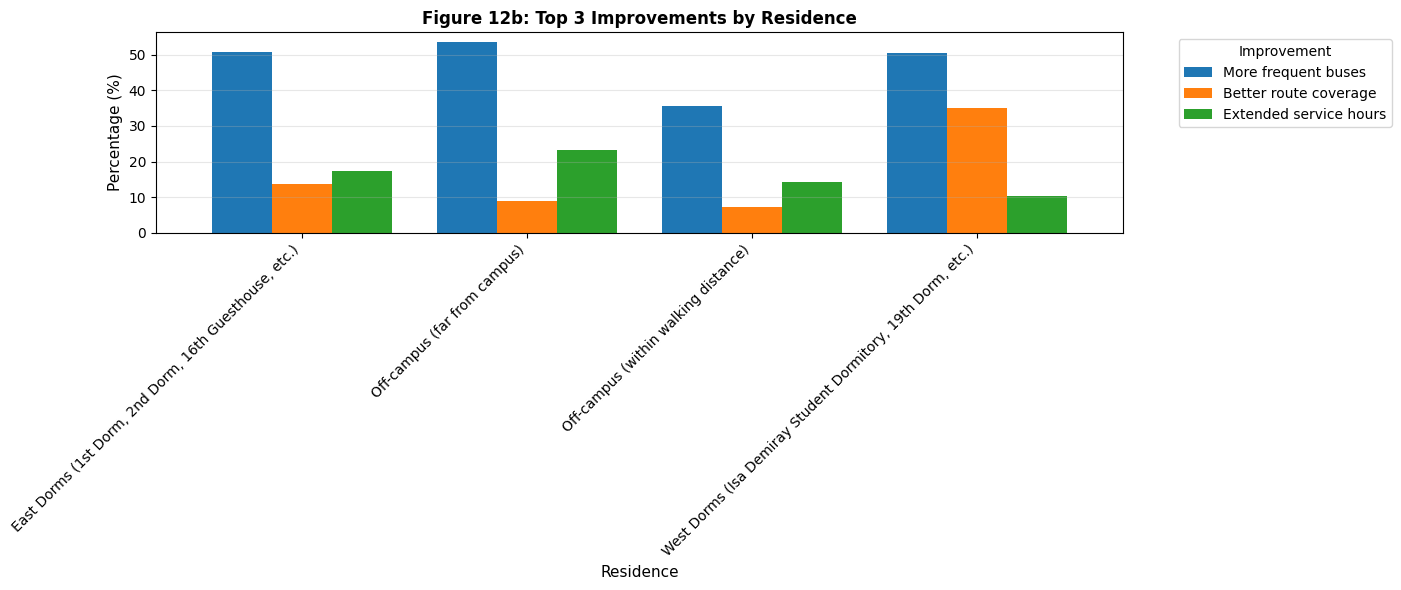

In [47]:
fig, ax = plt.subplots(figsize=(14, 6))
residence_top3.plot(kind='bar', ax=ax, width=0.8)
ax.set_xlabel('Residence', fontsize=11)
ax.set_ylabel('Percentage (%)', fontsize=11)
ax.set_title('Figure 12b: Top 3 Improvements by Residence', 
              fontsize=12, fontweight='bold')
ax.legend(title='Improvement', bbox_to_anchor=(1.05, 1), loc='upper left')
ax.set_xticklabels(residence_top3.index, rotation=45, ha='right')
ax.grid(axis='y', alpha=0.3)
plt.tight_layout()
plt.show()

In [48]:
crowding_improvement = pd.crosstab(df['Problem_TooCrowded_Binary'], 
                                    df['MostValuable_Improvement'], 
                                    normalize='index') * 100

In [49]:
crowding_improvement

MostValuable_Improvement,Better real-time tracking,Better route coverage,Extended service hours,Improved punctuality,More comfortable buses,More frequent buses
Problem_TooCrowded_Binary,,,,,,
False,18.309859,11.267606,25.352113,1.408451,0.000000,43.661972
True,7.874016,22.834646,12.992126,2.755906,1.181102,52.362205


In [50]:
freq_bus_by_crowding = crowding_improvement['More frequent buses']
freq_bus_by_crowding

Problem_TooCrowded_Binary
False    43.661972
True     52.362205
Name: More frequent buses, dtype: float64

In [51]:
wait_improvement = pd.crosstab(df['Problem_LongWait_Binary'], 
                                df['MostValuable_Improvement'], 
                                normalize='index') * 100

In [52]:
wait_improvement

MostValuable_Improvement,Better real-time tracking,Better route coverage,Extended service hours,Improved punctuality,More comfortable buses,More frequent buses
Problem_LongWait_Binary,,,,,,
False,17.500000,19.166667,19.166667,1.666667,0.833333,41.666667
True,5.853659,20.975610,13.658537,2.926829,0.975610,55.609756


In [53]:
freq_bus_by_wait = wait_improvement['More frequent buses']
freq_bus_by_wait

Problem_LongWait_Binary
False    41.666667
True     55.609756
Name: More frequent buses, dtype: float64

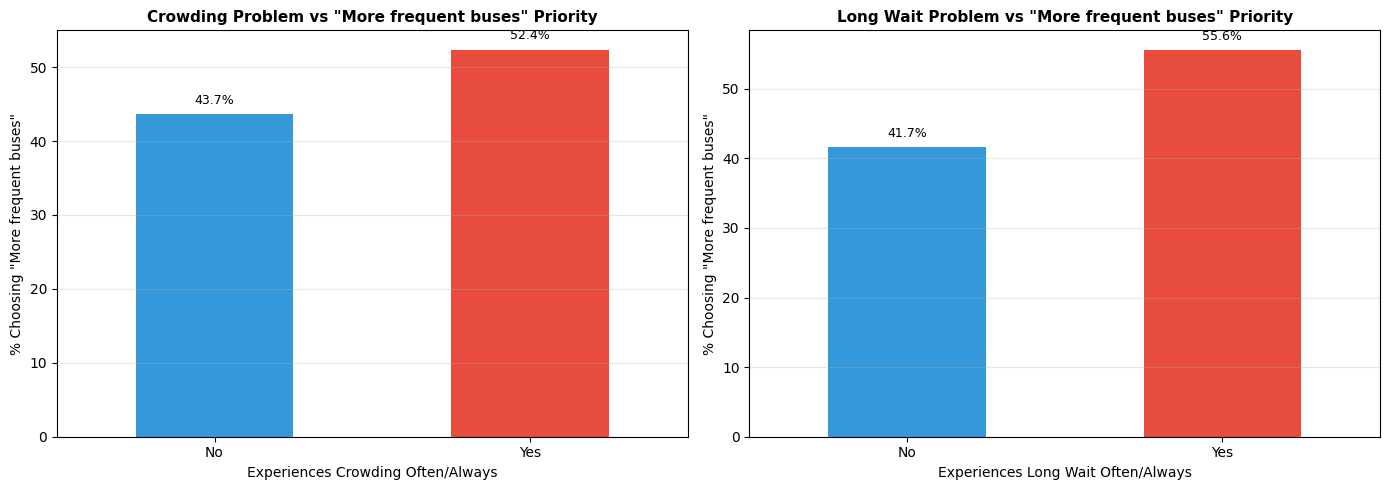

In [62]:
# Option 1: Add percentage labels on bars
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(14, 5))

# Crowding vs More frequent buses
bars1 = freq_bus_by_crowding.plot(kind='bar', ax=ax1, color=['#3498db', '#e74c3c'])
ax1.set_xlabel('Experiences Crowding Often/Always', fontsize=10)
ax1.set_ylabel('% Choosing "More frequent buses"', fontsize=10)
ax1.set_title('Crowding Problem vs "More frequent buses" Priority', 
               fontsize=11, fontweight='bold')
ax1.set_xticklabels(['No', 'Yes'], rotation=0)
ax1.grid(axis='y', alpha=0.3)

# Add percentage labels on bars
for i, (idx, val) in enumerate(freq_bus_by_crowding.items()):
    ax1.text(i, val + 1, f'{val:.1f}%', ha='center', va='bottom', fontsize=9)

# Long Wait vs More frequent buses
bars2 = freq_bus_by_wait.plot(kind='bar', ax=ax2, color=['#3498db', '#e74c3c'])
ax2.set_xlabel('Experiences Long Wait Often/Always', fontsize=10)
ax2.set_ylabel('% Choosing "More frequent buses"', fontsize=10)
ax2.set_title('Long Wait Problem vs "More frequent buses" Priority', 
               fontsize=11, fontweight='bold')
ax2.set_xticklabels(['No', 'Yes'], rotation=0)
ax2.grid(axis='y', alpha=0.3)

# Add percentage labels on bars
for i, (idx, val) in enumerate(freq_bus_by_wait.items()):
    ax2.text(i, val + 1, f'{val:.1f}%', ha='center', va='bottom', fontsize=9)

plt.tight_layout()
plt.show()

In [56]:
usage_improvement = pd.crosstab(df['Usage_Intensity'], 
                                 df['MostValuable_Improvement'], 
                                 normalize='index') * 100

In [57]:
usage_improvement

MostValuable_Improvement,Better real-time tracking,Better route coverage,Extended service hours,Improved punctuality,More comfortable buses,More frequent buses
Usage_Intensity,,,,,,
High,7.594937,22.784810,16.877637,2.953586,0.843882,48.945148
Low,10.000000,5.000000,25.000000,0.000000,0.000000,60.000000
Medium,19.117647,16.176471,8.823529,1.470588,1.470588,52.941176


In [58]:
for intensity in ['Low', 'Medium', 'High']:
    if intensity in usage_improvement.index:
        top = usage_improvement.loc[intensity].idxmax()
        pct = usage_improvement.loc[intensity, top]
        print(f"{intensity}: {top} ({pct:.1f}%)")

Low: More frequent buses (60.0%)
Medium: More frequent buses (52.9%)
High: More frequent buses (48.9%)


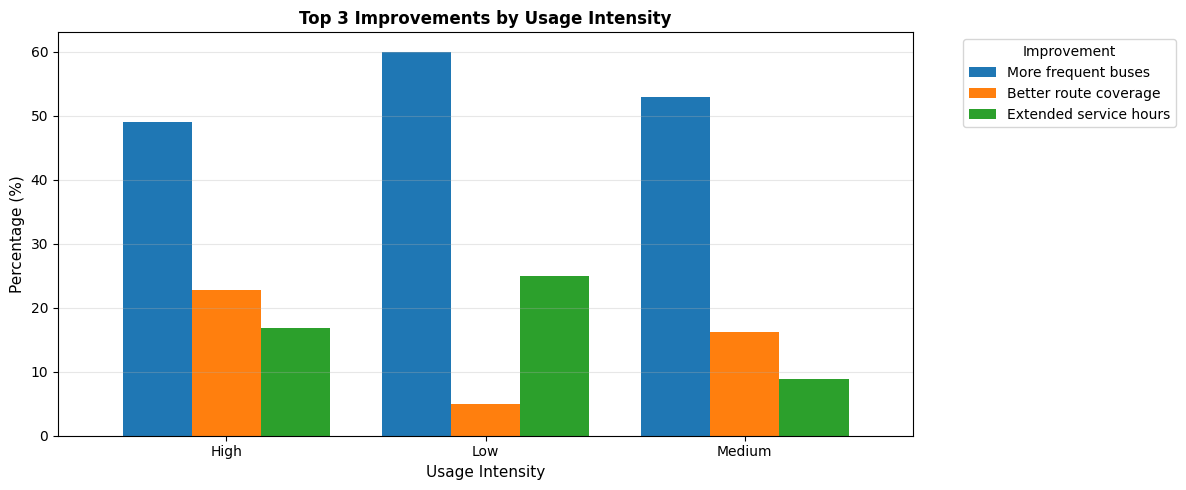

In [59]:
fig, ax = plt.subplots(figsize=(12, 5))
usage_top3 = usage_improvement[top_3_improvements]
usage_top3.plot(kind='bar', ax=ax, width=0.8)
ax.set_xlabel('Usage Intensity', fontsize=11)
ax.set_ylabel('Percentage (%)', fontsize=11)
ax.set_title('Top 3 Improvements by Usage Intensity', fontsize=12, fontweight='bold')
ax.legend(title='Improvement', bbox_to_anchor=(1.05, 1), loc='upper left')
ax.set_xticklabels(usage_top3.index, rotation=0)
ax.grid(axis='y', alpha=0.3)
plt.tight_layout()
plt.show()

In [61]:
for residence in residence_top3.index:
    top = residence_top3.loc[residence].idxmax()
    pct = residence_top3.loc[residence, top]
    print(f"{residence}: {top} ({pct:.1f}%)")

East Dorms (1st Dorm, 2nd Dorm, 16th Guesthouse, etc.): More frequent buses (50.7%)
Off-campus (far from campus): More frequent buses (53.6%)
Off-campus (within walking distance): More frequent buses (35.7%)
West Dorms (Isa Demiray Student Dormitory, 19th Dorm, etc.): More frequent buses (50.4%)
